# Лабораторная работа №1. 
**"Аналитический и численный (Брауна-Робинсон) методы решения антагонистической игры в смешанных стратегиях**

**Выполнил: Александров А. Н., ИУ8-104**

**Вариант: 1**

## Задание
Найти цену игры и оптимальные стратегии обоих игроков методами обратной матрицы (аналитически) и Брауна-Робинсон. Сравнить полученные результаты.

Игра Г размера (3 x 3) задана матрицей:
 
| 1  | 11 | 11 |
|:--:|:--:|:--:|
| 7  | 5  | 8  | 
| 16 | 6  | 2  | 


In [827]:
import logging
from pathlib import Path
from copy import deepcopy

import numpy as np

from game_theory.utils.matrix_games.brown_robinson.brown_robinson import BrownRobinson
from game_theory.utils.matrix_games.brown_robinson.labels import (
    MAXMIN_ESTIMATION_LABEL,
    MINMAX_ESTIMATION_LABEL,
    ACCURACY_LABEL,
)
from game_theory.utils.matrix_games.analytical import AnalyticalSolver
from game_theory.utils.matrix_games.game_matrix import GameMatrix
from game_theory.utils.matrix_games.mixed_strategies import (
    check_resulted_game_price,
    get_resulted_mixed_strategies,
)

logging.basicConfig(level=logging.INFO, format='%(message)s')

In [828]:
# Входная матрица прямоугольной игры с нулевой суммой.
game_matrix = GameMatrix(
    matrix=np.array(
        [
            [1, 11, 11],
            [7,  5,  8],
            [16, 6,  2],
        ],
        dtype=int,
    )
)
game_matrix

+-----------------------------------------------+
|          Таблица стратегий (игрока А)         |
+----------------+----+----+----+---------------+
|   Стратегии    | b1 | b2 | b3 | MIN выигрыш A |
+----------------+----+----+----+---------------+
|       a1       | 1  | 11 | 11 |       1       |
|       a2       | 7  | 5  | 8  |       5       |
|       a3       | 16 | 6  | 2  |       2       |
| MAX проигрыш B | 16 | 11 | 11 |               |
+----------------+----+----+----+---------------+

In [829]:
print(f"Нижняя цена игры:  {game_matrix.lowest_game_price[1]}\n"
      f"Верхняя цена игры: {game_matrix.highest_game_price[1]}")

Нижняя цена игры:  5
Верхняя цена игры: 11


In [830]:
reduced_game: GameMatrix = game_matrix.reduce_dimension(method='dominant_absorption')
reduced_game

+-----------------------------------------------+
|          Таблица стратегий (игрока А)         |
+----------------+----+----+----+---------------+
|   Стратегии    | b1 | b2 | b3 | MIN выигрыш A |
+----------------+----+----+----+---------------+
|       a1       | 1  | 11 | 11 |       1       |
|       a2       | 7  | 5  | 8  |       5       |
|       a3       | 16 | 6  | 2  |       2       |
| MAX проигрыш B | 16 | 11 | 11 |               |
+----------------+----+----+----+---------------+

### 1. Аналитический (матричный) метод

#### 1.1. Обратная матрица для игрока A

Для игрока $A$ ($h$ - цена игры; $y_1, ..., y_m$ - смешанные стратегии игрока $A$):

![analytical_A](./img/analytical_A.png)

In [831]:
analytical_solver = AnalyticalSolver(reduced_game)
(
    first_mixed_strategy,
    second_mixed_strategy,
    third_mixed_strategy,
    game_price_value,
) = analytical_solver.player_a_solve()

In [832]:
# Смешанные стратегии игрока A и цена игры.
assert check_resulted_game_price(
    game_matrix=reduced_game,
    game_price_value=game_price_value,
)

mixed_strategies = get_resulted_mixed_strategies(
    player_labels=game_matrix.player_a_strategy_labels,
    labels_to_probability=dict(zip(
        reduced_game.player_a_strategy_labels,
        (first_mixed_strategy, second_mixed_strategy, third_mixed_strategy),
    )),
    player_name="A",
)
print(mixed_strategies)

Цена игры: 5 <= 7.389 <= 11


+------------------------------+
| Смешанные стратегии игрока A |
+---------+---------+----------+
|    a1   |    a2   |    a3    |
+---------+---------+----------+
|  0.352  |  0.370  |  0.278   |
+---------+---------+----------+


In [833]:
sum((first_mixed_strategy, second_mixed_strategy, third_mixed_strategy,))

1.0

#### 2.2.1. Прямая матрица для игрока B
Для игрока $B$ ($g$ - цена игры; $x_1, ..., y_n$ - смешанные стратегии игрока $B$):

![analytical_B](./img/analytical_B.png)

In [834]:
analytical_solver = AnalyticalSolver(reduced_game)
(
    first_mixed_strategy,
    second_mixed_strategy,
    third_mixed_strategy,
    game_price_value,
) = analytical_solver.player_b_solve()

In [835]:
# Смешанные стратегии игрока B и цена игры.
assert check_resulted_game_price(
    game_matrix=reduced_game,
    game_price_value=game_price_value,
)

mixed_strategies = get_resulted_mixed_strategies(
    player_labels=game_matrix.player_b_strategy_labels,
    labels_to_probability=dict(zip(
        reduced_game.player_b_strategy_labels,
        (first_mixed_strategy, second_mixed_strategy, third_mixed_strategy),
    )),
    player_name="B",
)
print(mixed_strategies)

Цена игры: 5 <= 7.389 <= 11


+------------------------------+
| Смешанные стратегии игрока B |
+---------+---------+----------+
|    b1   |    b2   |    b3    |
+---------+---------+----------+
|  0.361  |  0.083  |  0.556   |
+---------+---------+----------+


In [836]:
sum((first_mixed_strategy, second_mixed_strategy, third_mixed_strategy,))

1.0

### 2. Численный метод Брауна-Робинсон

Уровень погрешности: $\varepsilon \le 0,1$

In [837]:
reduced_game

+-----------------------------------------------+
|          Таблица стратегий (игрока А)         |
+----------------+----+----+----+---------------+
|   Стратегии    | b1 | b2 | b3 | MIN выигрыш A |
+----------------+----+----+----+---------------+
|       a1       | 1  | 11 | 11 |       1       |
|       a2       | 7  | 5  | 8  |       5       |
|       a3       | 16 | 6  | 2  |       2       |
| MAX проигрыш B | 16 | 11 | 11 |               |
+----------------+----+----+----+---------------+

In [838]:
brown_robinson = BrownRobinson(game_matrix=reduced_game, accuracy=0.1)
df = brown_robinson.solve(out=Path("iterations_table.csv"), mode="previous")
df

,k,A,B,a1,a2,a3,b1,b2,b3,ВЦИ,НЦИ,ε
0,1,a1,b3,11,8,2,1,11,11,11.000000,1.000000,10.000000
1,2,a1,b1,12,15,18,2,22,22,9.000000,1.000000,8.000000
2,3,a3,b1,13,22,34,18,28,24,11.333333,6.000000,3.000000
3,4,a3,b1,14,29,50,34,34,26,12.500000,6.500000,2.500000
4,5,a3,b3,25,37,52,50,40,28,10.400000,5.600000,2.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
234,235,a1,b1,1775,1733,1692,1645,1775,1790,7.553191,7.000000,0.190691
235,236,a1,b1,1776,1740,1708,1646,1786,1801,7.525424,6.974576,0.162924
236,237,a1,b1,1777,1747,1724,1647,1797,1812,7.497890,6.949367,0.135390
237,238,a1,b1,1778,1754,1740,1648,1808,1823,7.470588,6.924370,0.108088


In [839]:
# Приближенная цена игры игроков.
game_price_value = brown_robinson.game_price_estimation
# Приближенные смешанные стратегии игроков.
(
    (strategy_a_1, strategy_a_2, strategy_a_3),
    (strategy_b_1, strategy_b_2, strategy_b_3),
) = brown_robinson.mixed_strategies

In [840]:
# Смешанные стратегии игрока A и цена игры.
assert check_resulted_game_price(
    game_matrix=reduced_game,
    game_price_value=game_price_value,
)

Цена игры: 5 <= 7.403 <= 11


In [841]:
mixed_strategies = get_resulted_mixed_strategies(
    player_labels=game_matrix.player_a_strategy_labels,
    labels_to_probability=dict(zip(
        reduced_game.player_a_strategy_labels,
        (strategy_a_1, strategy_a_2, strategy_a_3),
    )),
    player_name="A",
)
print(mixed_strategies)

+------------------------------+
| Смешанные стратегии игрока A |
+---------+---------+----------+
|    a1   |    a2   |    a3    |
+---------+---------+----------+
|  0.393  |  0.356  |  0.251   |
+---------+---------+----------+


In [842]:
sum((strategy_a_1, strategy_a_2, strategy_a_3))

1.0

In [843]:
mixed_strategies = get_resulted_mixed_strategies(
    player_labels=game_matrix.player_b_strategy_labels,
    labels_to_probability=dict(zip(
        reduced_game.player_b_strategy_labels,
        (strategy_b_1, strategy_b_2, strategy_b_3),
    )),
    player_name="B",
)
print(mixed_strategies)

+------------------------------+
| Смешанные стратегии игрока B |
+---------+---------+----------+
|    b1   |    b2   |    b3    |
+---------+---------+----------+
|  0.356  |  0.092  |  0.552   |
+---------+---------+----------+


In [844]:
sum((strategy_b_1, strategy_b_2, strategy_b_3))

1.0

<Axes: title={'center': 'График сходимости верхней и нижней цен игры в алгоритме Брауна-Робинсон'}, xlabel='Итерации алгоритма', ylabel='Значения цен игры'>

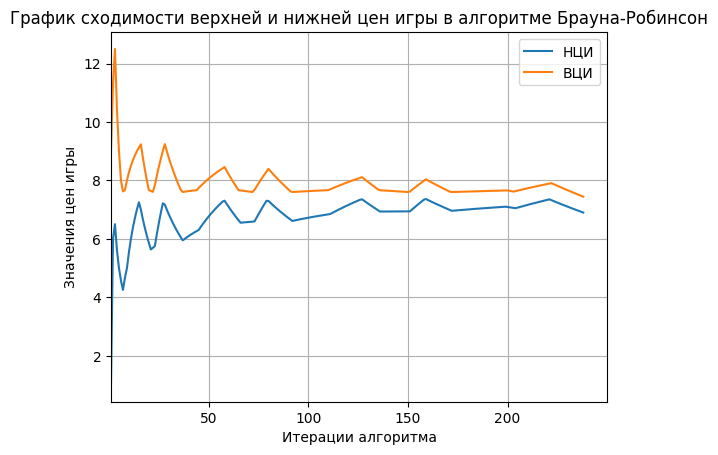

In [845]:
df[[MAXMIN_ESTIMATION_LABEL, MINMAX_ESTIMATION_LABEL]].plot(
    title="График сходимости верхней и нижней цен игры в алгоритме Брауна-Робинсон",
    xlabel="Итерации алгоритма",
    ylabel="Значения цен игры",
    xlim=(1, None),
    grid=True,
)

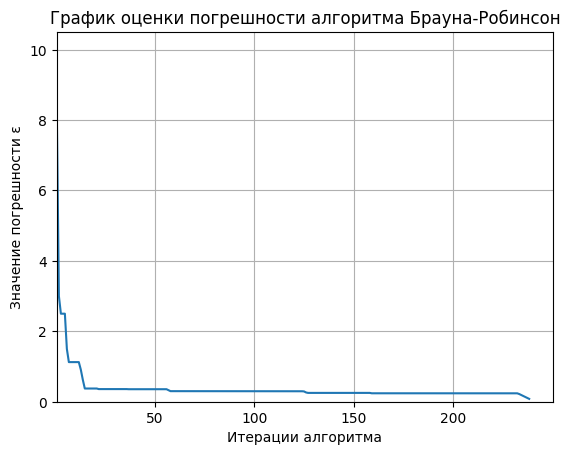

In [846]:
plt = df[ACCURACY_LABEL].plot(
    title="График оценки погрешности алгоритма Брауна-Робинсон",
    xlabel="Итерации алгоритма",
    ylabel="Значение погрешности ε",
    xlim=(1, None),
    ylim=(0, None),
    grid=True,
)